<a href="https://colab.research.google.com/github/siro844/Spam-email-classifier/blob/main/spam_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [110]:
import numpy as np
import pandas as pd

In [111]:
df = pd.read_csv('spam.csv', encoding='latin-1')

In [112]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3691,ham,No i am not having not any movies in my laptop,NaN,NaN,NaN
4348,ham,ÌÏ bot notes oredi... Cos i juz rem i got...,NaN,NaN,NaN
5342,spam,u r subscribed 2 TEXTCOMP 250 wkly comp. 1st w...,NaN,NaN,NaN
3017,ham,I didn't get the second half of that message,NaN,NaN,NaN
5037,ham,Thanks for being there for me just to talk to ...,NaN,NaN,NaN


In [113]:
df.shape

(5572, 5)

**Data Cleaning**

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [115]:
df.drop(columns=['Unnamed: 2','Unnamed: 3', 'Unnamed: 4'],inplace=True)

In [116]:
df.sample(5)

,v1,v2
1943,ham,I got lousy sleep. I kept waking up every 2 ho...
2897,ham,If you r @ home then come down within 5 min
3581,ham,You are right. Meanwhile how's project twins c...
2825,ham,Ok lor...
5371,ham,"Lol, oh you got a friend for the dog ?"


In [117]:
df.rename(columns={'v1':'category','v2':'text'},inplace=True)

In [118]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['category']=encoder.fit_transform(df['category'])

In [119]:
df.head()

,category,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [120]:
df.isnull().sum()

category    0
text        0
dtype: int64

In [121]:
df.duplicated().sum()

403

In [122]:
df=df.drop_duplicates(keep='first')

In [123]:
df.duplicated().sum()

0

In [124]:
df.shape

(5169, 2)

Exploratory Data Analysis

In [125]:
df['category'].value_counts()

0    4516
1     653
Name: category, dtype: int64

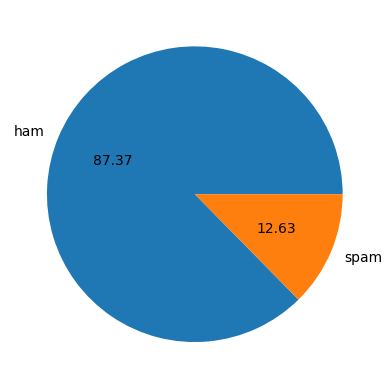

In [126]:
import matplotlib.pyplot as plt
plt.pie(df['category'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

Data is imbalanced


In [127]:
!pip install nltk

In [128]:
import nltk

In [129]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [130]:
df['char_num']=df['text'].apply(len)

In [131]:
df.head()

,category,text,char_num
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [132]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [133]:
df.head()

,category,text,char_num,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [134]:
df['num_sent']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [135]:
df.head()

,category,text,char_num,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [136]:
df[['char_num','num_words','num_sent']].describe()

,char_num,num_words,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


#ham

In [137]:
df[df['category']==0] [['char_num','num_words','num_sent']].describe()

,char_num,num_words,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


#spam


In [138]:
df[df['category']==1] [['char_num','num_words','num_sent']].describe()

,char_num,num_words,num_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [139]:
import seaborn as sns

<Axes: xlabel='char_num', ylabel='Count'>

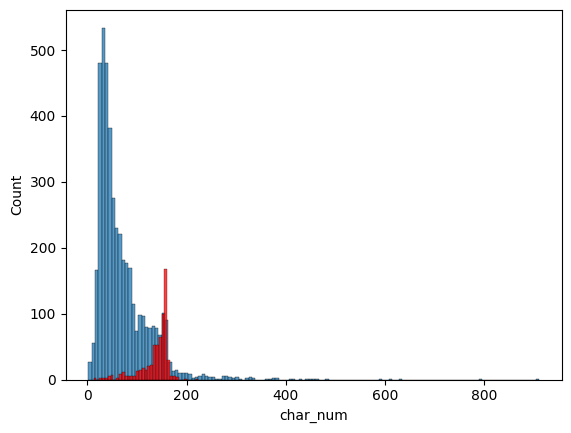

In [140]:
sns.histplot(df[df['category']==0]['char_num'])
sns.histplot(df[df['category']==1]['char_num'],color='red')

In [141]:
df.head()

,category,text,char_num,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


<Axes: xlabel='num_words', ylabel='Count'>

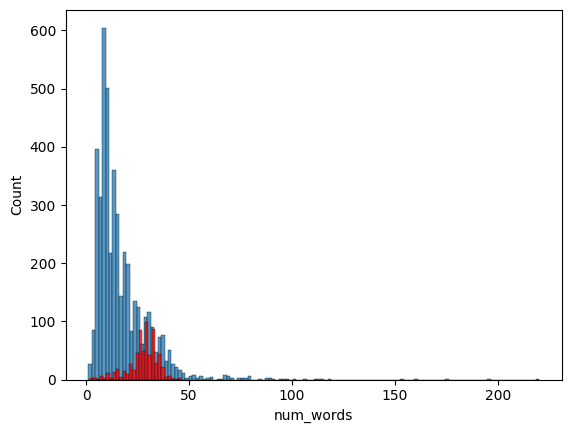

In [142]:
sns.histplot(df[df['category']==0]['num_words'])
sns.histplot(df[df['category']==1]['num_words'],color='red')

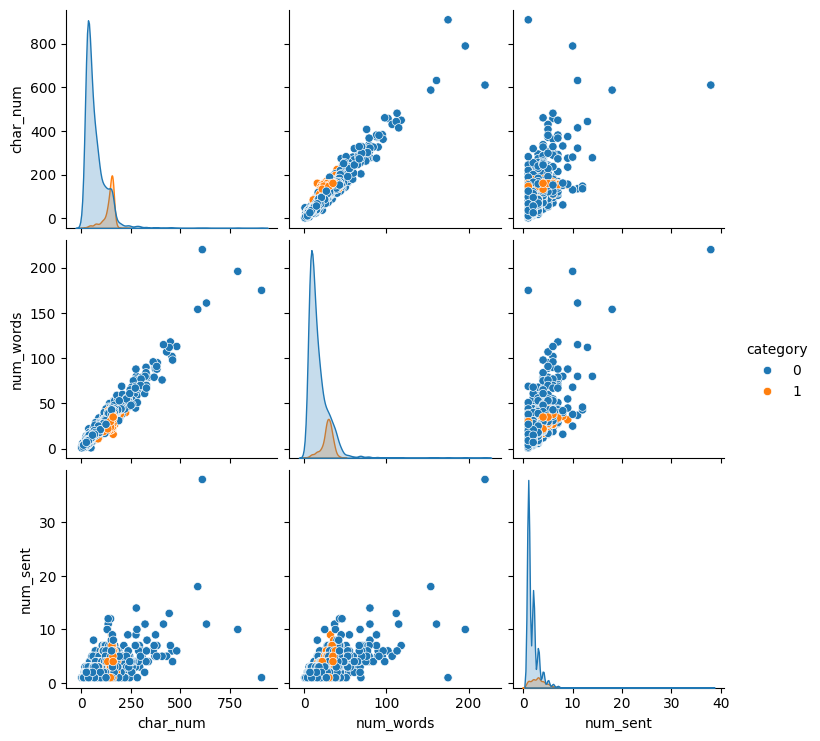

In [143]:
sns.pairplot(df,hue='category')

<ipython-input-144-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

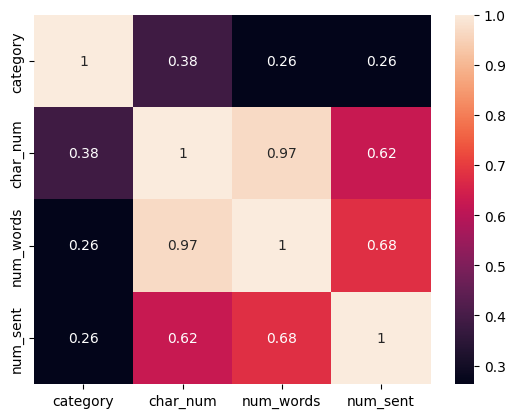

In [144]:
sns.heatmap(df.corr(),annot=True)

**Data Preprocessing**
*   Lower Case
*   Tokenization
*   Removing special Characters
*   Removing stop words and punctuation
*   Stemming



In [145]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords.words('english')
import string
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [146]:
def transform_text(text):
  text=text.lower()
  text=nltk.word_tokenize(text)
  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)
  text=y[:]
  y.clear()
  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)
  text=y[:]
  y.clear()
  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)

In [147]:
transform_text('Hi Srinath , how are you?')

'hi srinath'

In [148]:
df['transformed_text']=df['text'].apply(transform_text)

In [149]:
df.head()

,category,text,char_num,num_words,num_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


WordCloud for both ham and spam messages

In [150]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [151]:
spam_wc=wc.generate(df[df['category']==1]['transformed_text'].str.cat(sep=" "))

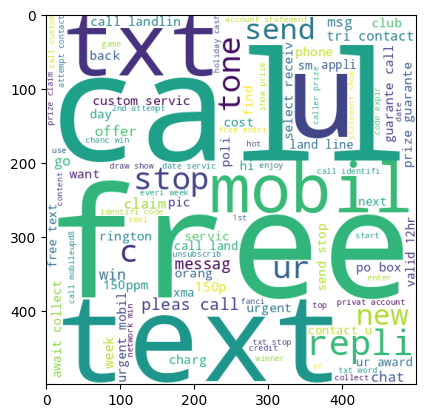

In [152]:
plt.imshow(spam_wc)

In [153]:
ham_wc=wc.generate(df[df['category']==0]['transformed_text'].str.cat(sep=" "))

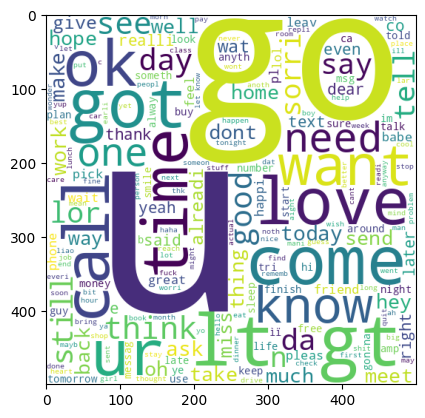

In [154]:
plt.imshow(ham_wc)

In [155]:
df.head()

,category,text,char_num,num_words,num_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [156]:
spam_corpus=[]
for msg in df[df['category']==1]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [157]:
len(spam_corpus)

9939

<Axes: ylabel='0'>

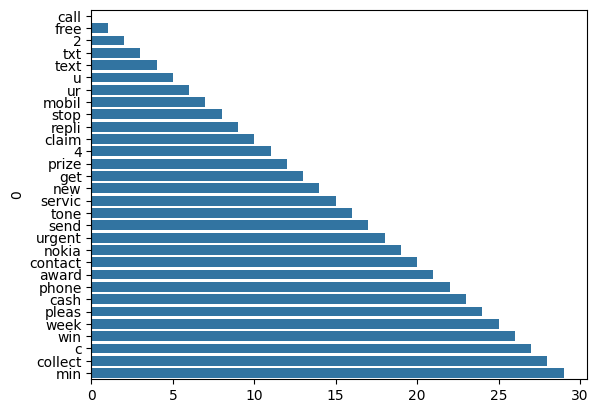

In [158]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0])


<Axes: ylabel='1'>

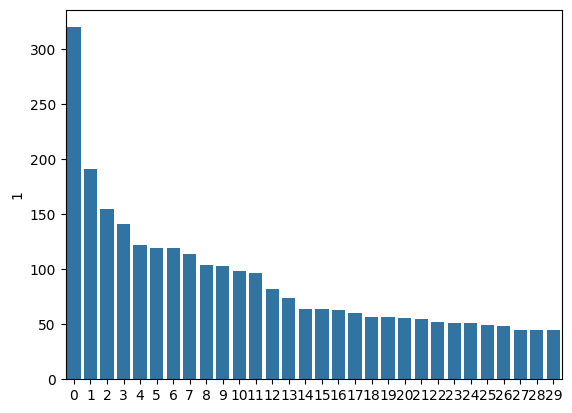

In [159]:
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[1])

In [160]:
ham_corpus=[]
for msg in df[df['category']==0]['transformed_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

<Axes: ylabel='0'>

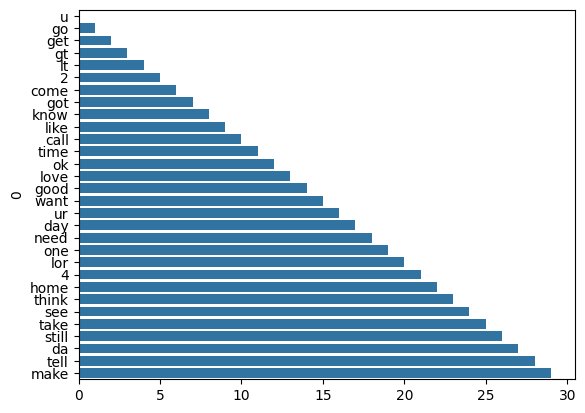

In [161]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0])


<Axes: ylabel='1'>

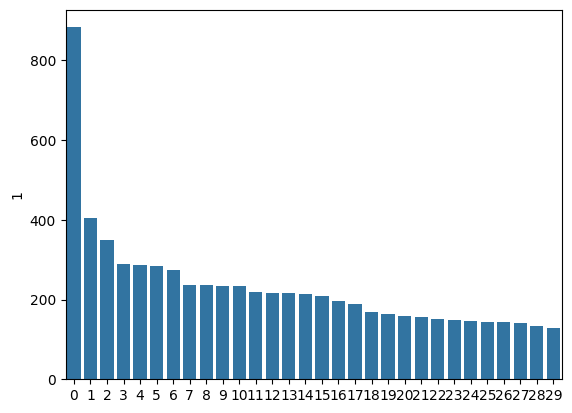

In [162]:
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[1])

In [163]:
pd.DataFrame(Counter(ham_corpus).most_common(30))

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


**Model Building**

In [168]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf =TfidfVectorizer()

In [169]:
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [170]:
X.shape

(5169, 6708)

In [171]:
y=df['category'].values

In [172]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)


In [173]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [174]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [175]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8713733075435203
[[774 111]
 [ 22 127]]
0.5336134453781513


In [176]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9458413926499033
[[885   0]
 [ 56  93]]
1.0


In [178]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9661508704061895
[[881   4]
 [ 31 118]]
0.9672131147540983


In [ ]:
#tfidf + mnb performs the best